
To do: 
- split this into three notebooks - basis transforms, kernels, nueral nets then fill out each with content equations etc., 
- I would actually include the Newton's method content - this is the only way these demos actually work decently (gradient descent does not give good results very fast at all, you gotta take many thousand steps, and particularly so with the kernelized form)
- At some point it would be nice to expand this to include other function approximators - e.g., k-nn, random forests, etc., to give people total visualization and joint comparison

Odds and ends to deal with 
- the right panel, can we make it interactive?  rotate-able?  The surface needs to be darker.
- the circle dataset needs to be normalized to the first quadrant - right now its over [-1,1]x[-1,1]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

Load in dataset:

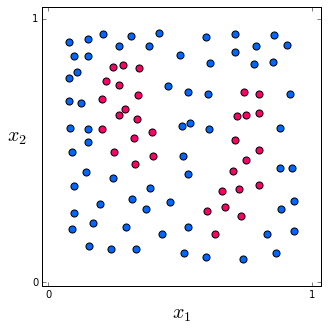

In [6]:
# load data
data = np.matrix(np.genfromtxt('2eggs_data.csv', delimiter=','))
X = np.asarray(data[:,0:-1])
y = np.asarray(data[:,-1])

# plot data
%run plotit - # from library of plotting functions
plot_toydata(X,y)

In [17]:
# choose between various feature types
%run my_kernel_utilities
%run my_utilities
D = 15                  # degree of poly / fourier, number of bases features, D = 12 works fine for random
feat_type = 'random'
make_random_params(X,D)

#K = create_kernel(X,D,feat_type)
K = create_features(X,D,feat_type)

Now that we have transformed our original data we can perform nonlinear classification using them.  Since none of the choice of bases have internal parameters we can then just solve the 'linear' classification problem.  Here we use the logistic regression (aka softmax) cost, but svms could also be used, and we could solve multiclass instances using One-versus-All if we so chose.

As with the previous instance where we used gradient descent, here we will simply adjust our original code by transforming the input data prior to running the algorithm. 

In [18]:
# perform optimization
%run logistic_optimization
best_w,num_misclasses = softmax_2class_newton(K,y,max_its = 20)

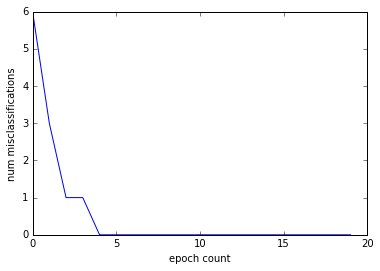

In [19]:
# plot misclassifications at each epoch to make sure everything works properly
plt.plot(num_misclasses)
plt.xlabel('epoch count')
plt.ylabel('num misclassifications')
plt.show()

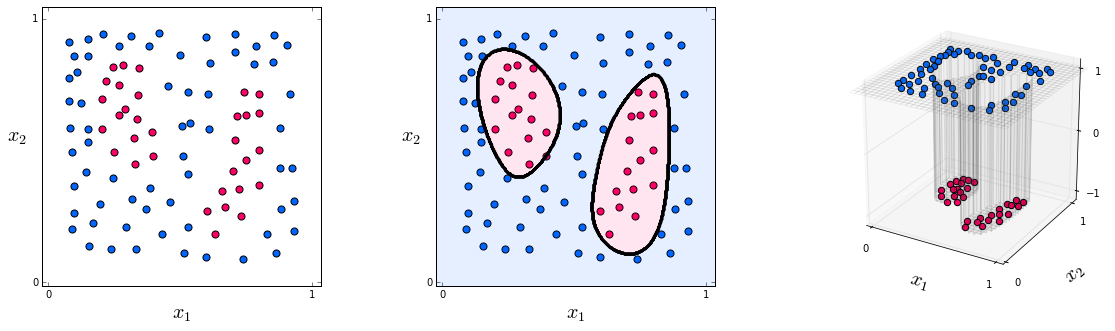

In [20]:
# plot toy data
%run plotit.py - # from library of plotting functions
plot_toydata_wnonlinear_rules(X,y,best_w,feat_type,D,raw_or_kernel = 0)

## note: the surface in the right plot needs to be darkened - 
## and it would be nice to make it so you could rotate the picture 

Then repeat all steps in next few cells with a 4-class dataset just for kicks

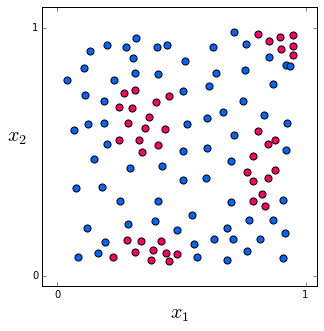

In [77]:
# load data
data = np.matrix(np.genfromtxt('4_eggs.csv', delimiter=','))
X = np.asarray(data[:,0:-1])
y = np.asarray(data[:,-1])

# plot data
%run plotit - # from library of plotting functions
plot_toydata(X,y)

# choose between various feature types
%run my_kernel_utilities
%run my_utilities
D = 4                  # degree of poly / fourier, number of bases features, D = 12 works fine for random
feat_type = 'poly'
make_random_params(X,D)

#K = create_kernel(X,D,feat_type)
K = create_features(X,D,feat_type)

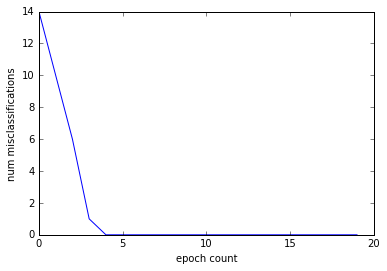

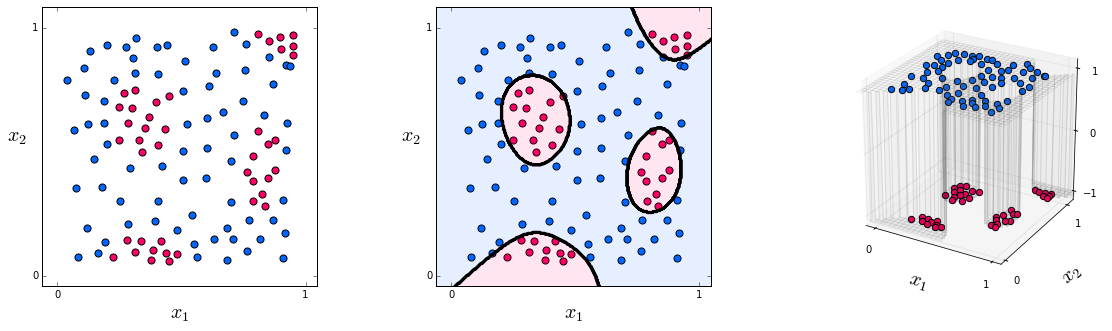

In [78]:
# perform optimization
%run logistic_optimization
best_w,num_misclasses = softmax_2class_newton(K,y,max_its = 20)

# plot misclassifications at each epoch to make sure everything works properly
plt.plot(num_misclasses)
plt.xlabel('epoch count')
plt.ylabel('num misclassifications')
plt.show()

# plot toy data
%run plotit.py - # from library of plotting functions
plot_toydata_wnonlinear_rules(X,y,best_w,feat_type,D,raw_or_kernel = 0)